# Training and Visualizing a Decision Tree

The DecisionTreeClassifier in scikit-learn uses randomness to enhance efficiency. Instead of evaluating all possible splits on all features, which is time-consuming, it sometimes considers only a random subset of features or potential splits. This speeds up training and can also help reduce overfitting.


- Understanding decision trees
- Visualizing the tree's decision boundaries
- Getting a more reliable score
- Tuning the hyperparameters for higher accuracy
- Building decision tree regressors

## Understanding Decision Trees

Trees generate rules after they're trained.

<img src="https://upload.wikimedia.org/wikipedia/commons/e/eb/Decision_Tree.jpg" width="500"/>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [2]:
# # if you want to save the image, you need to install graphviz
# # in Windows, if you are using Anaconda, you can install it with:
# # conda install graphviz
# # conda install python-graphviz
# # these should be executed in the Anaconda Prompt
# from sklearn.tree import export_graphviz
# from graphviz import Source

# export_graphviz(
#         tree_clf,
#         out_file=str("iris_tree.dot"),  # path differs in the book
#         feature_names=["petal length (cm)", "petal width (cm)"],
#         class_names=iris.target_names,
#         rounded=True,
#         filled=True
#     )


# Source.from_file("iris_tree.dot")

[Text(0.4, 0.8333333333333334, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

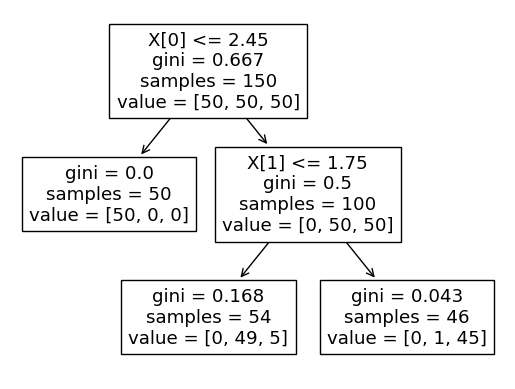

In [3]:
from sklearn import tree
tree.plot_tree(tree_clf)
# plot.show()
# fig.savefig('tree.png')

In [4]:
from sklearn.tree import export_text
print(export_text(tree_clf, feature_names=["petal length (cm)", "petal width (cm)"], spacing=3, decimals=2))

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- class: 1
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



# How do trees learn?

The model tries to find a condition where we can separate our classes as
much as possible. It does so using a splitting criteria, a **purity** measure.

The harder it is to separate classes, the deeper the branching goes.


# Decision boundaries

In [5]:
# let's learn about linspace and meshgrid
# we will use them to plot the decision boundaries
# linspace returns evenly spaced numbers over a specified interval
np.linspace(0, 10, 11)
np.linspace(0, 3, 11)
# meshgrid returns coordinate matrices from coordinate vectors
# xx and yy are matrices of 101x101
# xx is a matrix of 101 rows, each row is the vector [0, 0.1, 0.2, ..., 10]
# yy is a matrix of 101 columns, each column is the vector [0, 0.1, 0.2, ..., 3]
xx,yy = np.meshgrid(np.linspace(0, 10, 101), np.linspace(0, 3, 101))
# ravel returns a contiguous flattened array
# np.c_ concatenates the two arrays
np.c_[xx.ravel(), yy.ravel()]

array([[ 0. ,  0. ],
       [ 0.1,  0. ],
       [ 0.2,  0. ],
       ...,
       [ 9.8,  3. ],
       [ 9.9,  3. ],
       [10. ,  3. ]])

In [6]:
print(np.min(X_iris, axis = 0))
print(np.max(X_iris, axis = 0))

[1.  0.1]
[6.9 2.5]


# Making Predictions

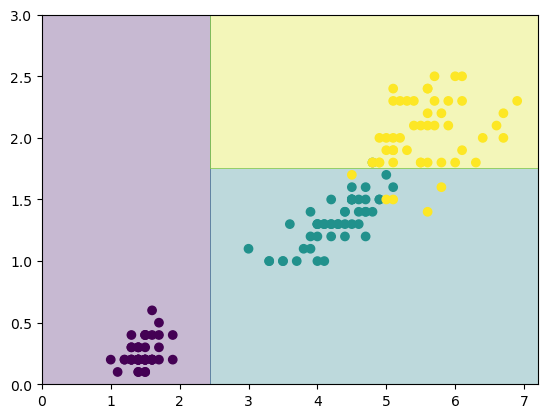

In [7]:
# Plotting Decision Boundaries
import numpy as np
import matplotlib.pyplot as plt

# create a dataset of with points at a meshgrid
xx, yy = np.meshgrid(np.linspace(0, 7.2, 1001), np.linspace(0, 3, 1001))
X_mesh = np.c_[xx.ravel(), yy.ravel()]

# let's predict the class of each point
y_mesh_pred = tree_clf.predict(X_mesh).reshape(xx.shape)

# let's plot the contours (bounding boxes) of these predictions
plt.contourf(xx, yy, y_mesh_pred, alpha=0.3)

# let's plot the original data
plt.scatter(X_iris[:,0],X_iris[:,1],c=y_iris)

# Estimating Class Probabilities 

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

In [10]:
# find the name of the predicted class
iris.target_names[tree_clf.predict([[5, 1.5]])[0]]

'versicolor'

# Regularization Hyperparameters

Decision trees are nonparametric models, not because it does not have any parameters but because the number of parameters is not determined prior to training, so the model structure is free to stick closely to the data. In contrast, a parametric model, such as a linear model, has a predetermined number of parameters, so its degree of freedom is limited. - HOML 2022 (textbook)

In [11]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

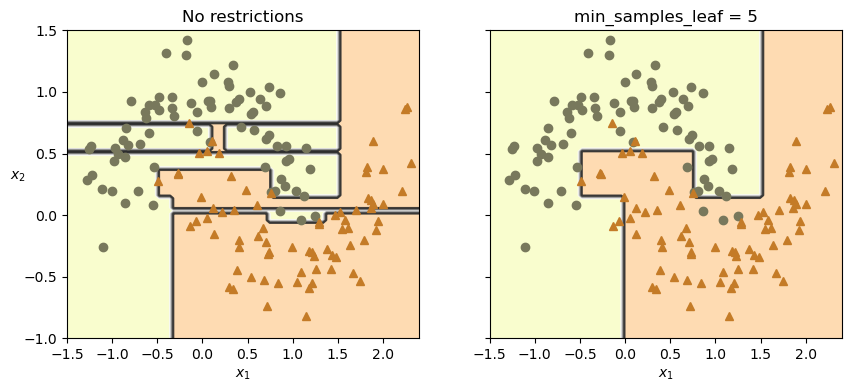

In [12]:
# extra code – this cell generates and saves decisions boundaries

def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
    colors = {"Wistia": ["#78785c", "#c47b27"], "Pastel1": ["red", "blue"]}
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons,
                       axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [13]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2,
                                        random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [14]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## Other regularization parameters

max_depth:

min_samples_split:

## Advance topic: Post Pruning

https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

As $\alpha$ increases, the amount of post pruning increase.

# Regression

Let's prepare a simple quadratic training set:

**Code example:**

In [15]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5  # a single random input feature
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [16]:
# export_graphviz(
#     tree_reg,
#     out_file=str("regression_tree.dot"),
#     feature_names=["x1"],
#     rounded=True,
#     filled=True
# )
# Source.from_file("regression_tree.dot")

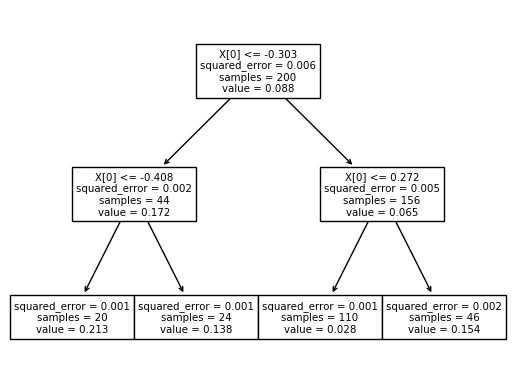

In [17]:
tree.plot_tree(tree_reg)
plt.show()

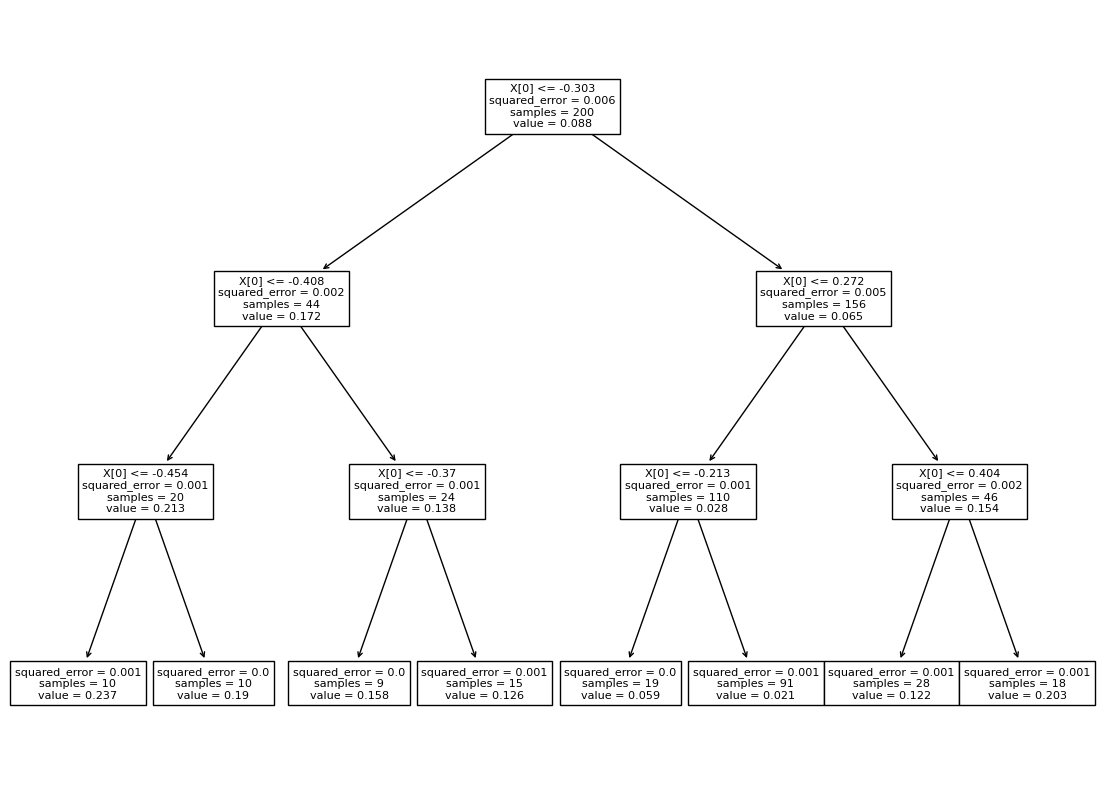

In [18]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

plt.figure(figsize=(14,10))
tree.plot_tree(tree_reg2)
plt.show()

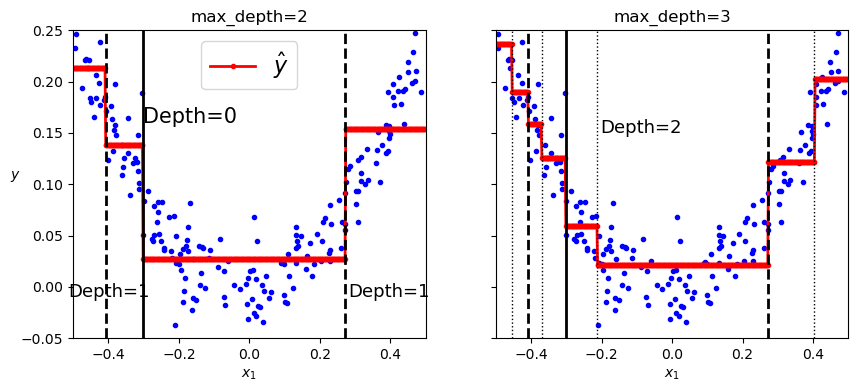

In [19]:
# extra code – this cell generates the figure below

def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$")
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth=0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
    plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
    plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")

plt.show()

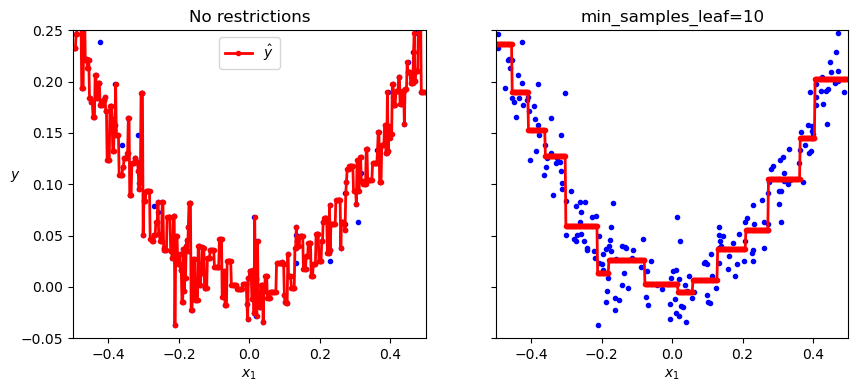

In [20]:
# extra code – this cell generates the figure below

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel("$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")

plt.show()

## Lab Task

1) Answer the following for decision tree regression tasks vs classification
    a) What should we predict in a leaf node?

    b) What impurity measure to use?

    c) When should we stop splitting?

    
2) What is Gini Index and how is it used in Decision Trees?

3) Create a decision tree using the credit risk dataset. Classify the customer into good or bad risk. Perform the following:
- Data cleaning (text)
- Parameter tuning

What can you tell me about the data and prediction outcomes? Are there potential biases or unfairness?